In [25]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
import xgboost as xgb
import optuna

In [26]:
df = pd.read_csv('Data/features_extracted.csv')
df = df.drop(columns=['steam_appid'])

In [27]:
df

,is_free,total_recommendations,price,num_languages,num_developers,num_publishers,num_genres,num_categories,lang_Afrikaans,lang_Albanian,...,developers_11,developers_12,developers_13,developers_14,developers_15,day,month,year,age,era
0,False,157570,999.0,8,1,1,1,6,False,False,...,0.0,0.000000,0.000000,0.000000,1.000000,1,11,2000,25,2000
1,False,21453,499.0,4,1,1,1,5,False,False,...,0.0,0.000000,0.000000,1.000000,0.000000,1,11,1999,26,1990
2,False,102430,999.0,8,1,1,1,11,False,False,...,0.0,0.000000,0.000000,0.000000,1.000000,19,11,1998,27,1990
3,False,19364,999.0,8,1,1,1,4,False,False,...,0.0,0.000000,0.000000,0.000000,1.000000,1,3,2004,21,2000
4,False,15826,499.0,3,1,1,1,3,False,False,...,0.0,0.000000,0.000000,1.000000,0.000000,1,6,2001,24,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90429,False,0,99.0,1,1,1,2,3,False,False,...,1.0,0.000000,1.000000,1.000000,0.000000,31,1,2025,0,2020
90430,True,0,0.0,1,9,1,2,2,False,False,...,0.0,0.888889,0.555556,0.555556,0.555556,3,2,2025,0,2020
90431,False,0,499.0,8,1,1,2,8,False,False,...,0.0,1.000000,0.000000,1.000000,0.000000,24,1,2025,0,2020
90432,False,0,1399.0,3,1,1,2,2,False,False,...,1.0,1.000000,1.000000,1.000000,1.000000,21,1,2025,0,2020


In [28]:
def visualize_distribution(prices):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
    fig.suptitle('Distribution')
    sns.histplot(prices, ax=ax1, bins=50, kde=True)
    ax2.boxplot(prices)
    plt.show()

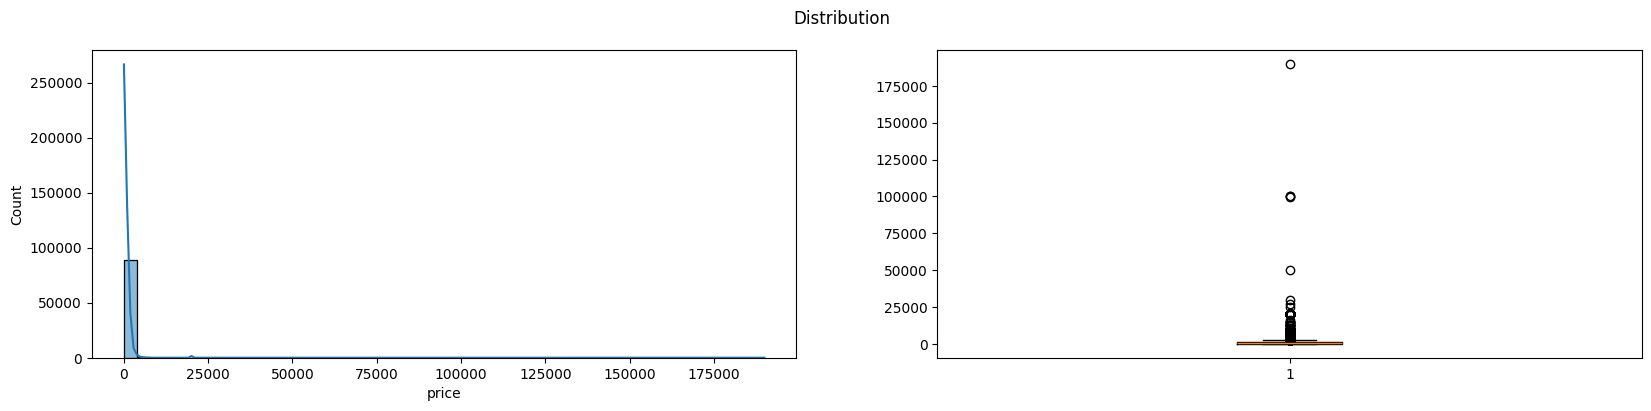

In [29]:
visualize_distribution(df['price'])

In [30]:
df['price_log'] = np.log1p(df['price'])

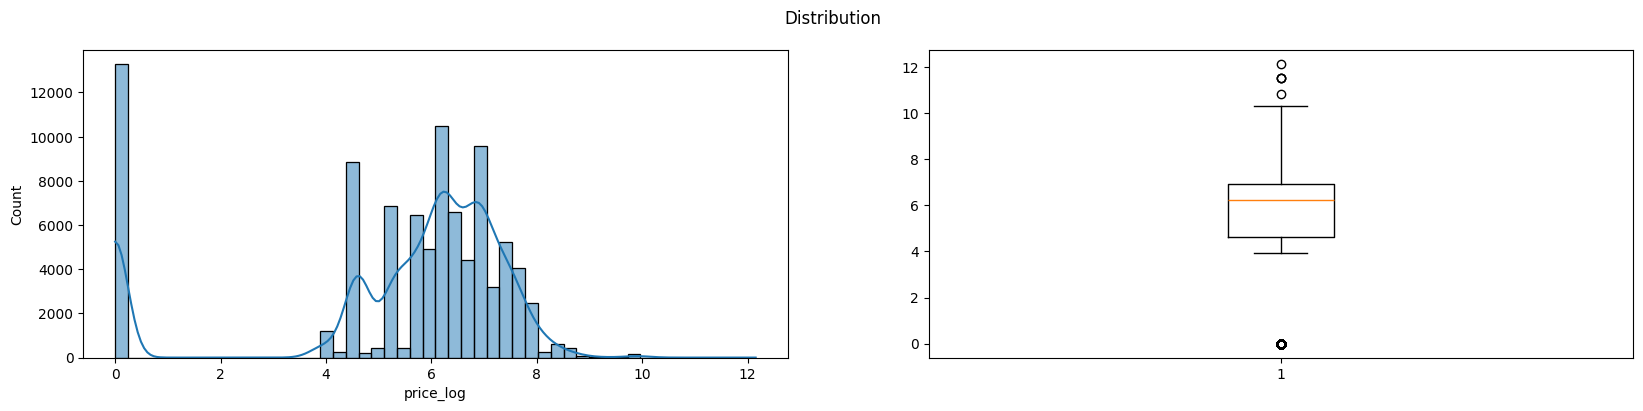

In [31]:
visualize_distribution(df['price_log'])

In [32]:
X = df.drop(columns=['price', 'price_log'])
y = df['price_log']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
def evaluate(model, X_test, y_test):
    scores = cross_validate(model, X_test, y_test, cv=10, scoring=['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'], n_jobs=-1)
    print(f"Variance of price: {np.var(y_test)}")
    print(f"Mean of price: {y_test.mean()}")
    print(f"R-squared Score: {scores['test_r2'].mean()}")
    print(f"Mean Squared Error: {scores['test_neg_mean_squared_error'].mean()}")
    print(f"Mean Absolute Error: {scores['test_neg_mean_absolute_error'].mean()}")

In [35]:
# model = xgb.XGBRegressor()
# model.fit(X_train, y_train)
# evaluate(model, X_train, y_train)
# evaluate(model, X_test, y_test)

In [36]:
# param_grid = {
#     'n_estimators': [100, 200, 300, 500, 700, 1000],
#     'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5, 0.7],
#     'max_depth': [3, 5, 10],
#     'min_child_weight': [1, 3, 5, 7, 10],
#     # 'subsample': [0.6, 0.7, 0.9],
#     # 'colsample_bytree': [0.6, 0.7, 0.9]
# }

# grid_search = GridSearchCV(xgb.XGBRegressor(), param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)

In [37]:
# def objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 1000, 2000, step=100),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'subsample': trial.suggest_float('subsample', 0.6, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
#     }
    
#     model = xgb.XGBRegressor(**params)
#     score = cross_val_score(model, X_train, y_train, scoring='r2', cv=5, n_jobs=-1).mean()
#     return score

# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=50)

In [38]:
# print("Best Parameters:", study.best_params)

In [39]:
model = xgb.XGBRegressor(n_estimators=2000, learning_rate=0.06369520322808017, min_child_weight=3, subsample=0.8407160888092043, colsample_bytree=0.7351467457636183, n_jobs=-1)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7351467457636183, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.06369520322808017, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [40]:
evaluate(model, X_train, y_train)
evaluate(model, X_test, y_test)

Variance of price: 5.807847886175791
Mean of price: 5.339521139544544
R-squared Score: 0.9114051128520726
Mean Squared Error: -0.5141450610150273
Mean Absolute Error: -0.5328149226326613
Variance of price: 5.681544871762115
Mean of price: 5.349646335693939
R-squared Score: 0.8959838474945915
Mean Squared Error: -0.5892165531374335
Mean Absolute Error: -0.5803744112108622


In [41]:
df_real = pd.read_csv('Data/x_real.csv')
df_real

,steam_appid,is_free,total_recommendations,price,num_languages,num_developers,num_publishers,num_genres,num_categories,lang_Afrikaans,...,developers_11,developers_12,developers_13,developers_14,developers_15,day,month,year,age,era
0,320,False,9393,NaN,1,1,1,1,4,False,...,0.0,0.0,0.0,0.0,1.0,1,11,2004,21,2000
1,2700,False,4098,NaN,10,2,2,2,2,False,...,0.0,1.0,1.0,1.0,0.5,12,3,2008,17,2000
2,3400,False,0,NaN,1,1,1,1,2,False,...,1.0,1.0,0.0,0.0,0.0,30,8,2006,19,2000
3,4580,False,6998,NaN,5,1,1,1,4,False,...,0.0,0.0,0.0,1.0,0.0,7,8,2007,18,2000
4,4760,False,12461,NaN,1,1,1,1,4,False,...,0.0,0.0,0.0,1.0,1.0,28,8,2007,18,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,3136360,False,0,NaN,2,1,1,1,3,False,...,1.0,1.0,0.0,0.0,0.0,22,1,2025,0,2020
845,3164240,False,0,NaN,8,1,1,3,10,False,...,0.0,1.0,0.0,0.0,0.0,2,9,2024,1,2020
846,3198850,False,0,NaN,13,1,1,1,5,False,...,1.0,1.0,1.0,1.0,0.0,13,1,2025,0,2020
847,3293360,False,0,NaN,1,1,1,2,2,False,...,0.0,0.0,1.0,0.0,1.0,9,11,2024,1,2020


In [42]:
X_real = df_real.drop(columns=['steam_appid', 'price'])

In [43]:
price_pred = model.predict(X_real)

In [44]:
df_price = pd.DataFrame(price_pred, columns=['price_log'])
df_price

,price_log
0,6.345912
1,6.039085
2,5.647779
3,7.146630
4,7.060919
...,...
844,6.494633
845,6.479952
846,6.479837
847,6.405221


In [45]:
df_price['price_exp'] = df_price['price_log'].apply(lambda x: np.expm1(x))
df_price

,price_log,price_exp
0,6.345912,569.157396
1,6.039085,418.508971
2,5.647779,282.660887
3,7.146630,1268.819204
4,7.060919,1164.515559
...,...,...
844,6.494633,660.581196
845,6.479952,650.939871
846,6.479837,650.864645
847,6.405221,603.995191


In [46]:
df_real['price'] = df_price['price_exp']

In [47]:
df_real[['steam_appid', 'price']].to_csv('Data/Missing price predicted.csv', index=False)

In [48]:
df_real

,steam_appid,is_free,total_recommendations,price,num_languages,num_developers,num_publishers,num_genres,num_categories,lang_Afrikaans,...,developers_11,developers_12,developers_13,developers_14,developers_15,day,month,year,age,era
0,320,False,9393,569.157396,1,1,1,1,4,False,...,0.0,0.0,0.0,0.0,1.0,1,11,2004,21,2000
1,2700,False,4098,418.508971,10,2,2,2,2,False,...,0.0,1.0,1.0,1.0,0.5,12,3,2008,17,2000
2,3400,False,0,282.660887,1,1,1,1,2,False,...,1.0,1.0,0.0,0.0,0.0,30,8,2006,19,2000
3,4580,False,6998,1268.819204,5,1,1,1,4,False,...,0.0,0.0,0.0,1.0,0.0,7,8,2007,18,2000
4,4760,False,12461,1164.515559,1,1,1,1,4,False,...,0.0,0.0,0.0,1.0,1.0,28,8,2007,18,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,3136360,False,0,660.581196,2,1,1,1,3,False,...,1.0,1.0,0.0,0.0,0.0,22,1,2025,0,2020
845,3164240,False,0,650.939871,8,1,1,3,10,False,...,0.0,1.0,0.0,0.0,0.0,2,9,2024,1,2020
846,3198850,False,0,650.864645,13,1,1,1,5,False,...,1.0,1.0,1.0,1.0,0.0,13,1,2025,0,2020
847,3293360,False,0,603.995191,1,1,1,2,2,False,...,0.0,0.0,1.0,0.0,1.0,9,11,2024,1,2020
